In [19]:
df<-read.csv('d:/data/heart/heart.csv') #데이터파일 로딩
head(df)
dim(df)
summary(df) #기초통계량

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


[1] 303  14

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [7]:
head(corrmatrix<-cor(df)) #상관계수 행렬

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00000000,-0.09844660,-0.06865302,0.27935091,0.21367796,0.12130765,-0.11621090,-0.398521938,0.09680083,0.210012567,-0.16881424,0.27632624,0.06800138,-0.22543872
sex,-0.09844660,1.00000000,-0.04935288,-0.05676882,-0.19791217,0.04503179,-0.05819627,-0.044019908,0.14166381,0.096092877,-0.03071057,0.11826141,0.21004110,-0.28093658
cp,-0.06865302,-0.04935288,1.00000000,0.04760776,-0.07690439,0.09444403,0.04442059,0.295762125,-0.39428027,-0.149230158,0.11971659,-0.18105303,-0.16173557,0.43379826
trestbps,0.27935091,-0.05676882,0.04760776,1.00000000,0.12317421,0.17753054,-0.11410279,-0.046697728,0.06761612,0.193216472,-0.12147458,0.10138899,0.06220989,-0.14493113
chol,0.21367796,-0.19791217,-0.07690439,0.12317421,1.00000000,0.01329360,-0.15104008,-0.009939839,0.06702278,0.053951920,-0.00403777,0.07051093,0.09880299,-0.08523911
fbs,0.12130765,0.04503179,0.09444403,0.17753054,0.01329360,1.00000000,-0.08418905,-0.008567107,0.02566515,0.005747223,-0.05989418,0.13797933,-0.03201934,-0.02804576


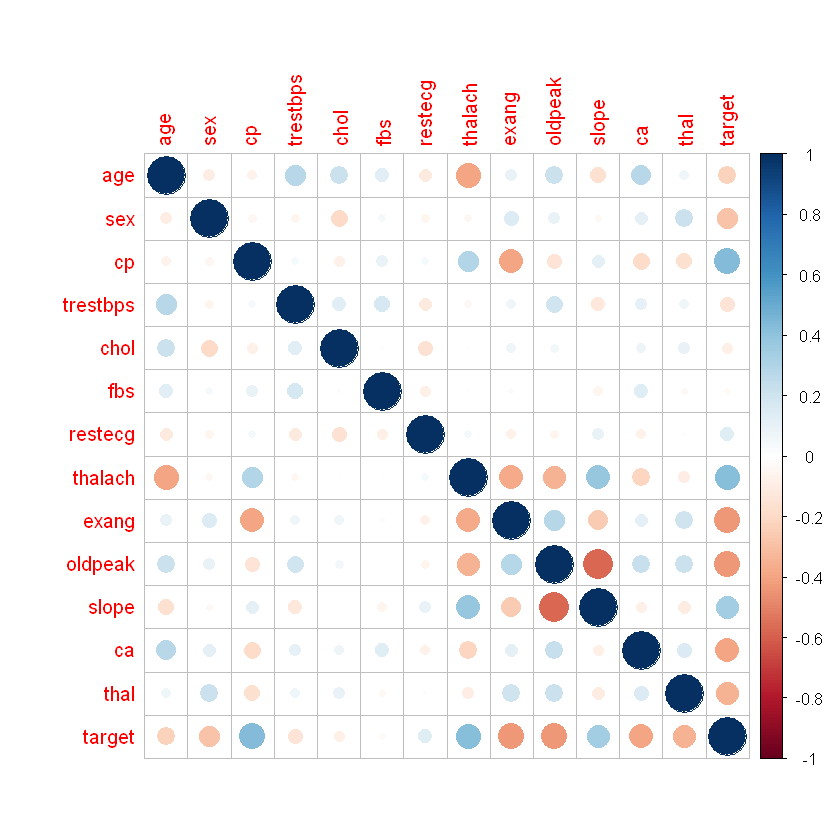

In [8]:
library(corrplot)
corrplot(corrmatrix,method='circle') #상관계수 플롯


  0   1 
138 165 

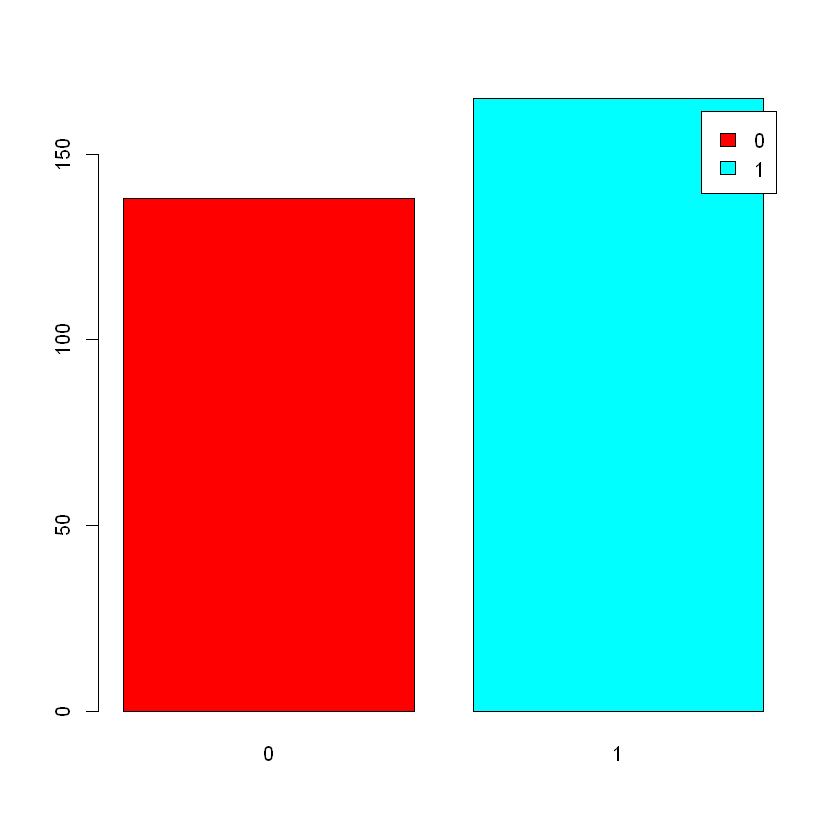

In [9]:
(tbl<-table(df$target)) # class 카운트
barplot(tbl,beside=T, legend=T, col=rainbow(2)) #카운트플롯

In [26]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(target ~ . , data=df, seed=1, method='under',
                    N=138*2)$data
(tbl<-table(df_samp$target))


  0   1 
138 138 

In [27]:
# # 오버 샘플링 - 과적합(overfitting) 문제가 발생할 수 있음
# df_samp<-ovun.sample(target ~ . ,data=df, seed=1, method='over',
#                     N=165*2)$data
# (tbl<-table(df_samp$target))

In [28]:
library(caret)
set.seed(123) #랜덤시드 고정
# 학습용 80%
idx_train<-createDataPartition(y=df_samp$target,p=0.8,list=F)
train<-df_samp[idx_train,] #학습용
X_train<-train[,-14] #독립변수
y_train<-train[,14] #종속변수
test<-df_samp[-idx_train,] #검증용
X_test<-test[,-14]
y_test<-test[,14]

In [29]:
model<-glm(target ~. , data=train, family=binomial)
summary(model) #로지스틱 회귀분석 모형


Call:
glm(formula = target ~ ., family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.44735  -0.37559   0.03674   0.53351   2.56803  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.157414   2.953043   1.069 0.284976    
age          0.010834   0.028112   0.385 0.699947    
sex         -2.085126   0.561809  -3.711 0.000206 ***
cp           0.814399   0.218286   3.731 0.000191 ***
trestbps    -0.016788   0.012565  -1.336 0.181498    
chol        -0.007014   0.005071  -1.383 0.166608    
fbs          0.231823   0.667297   0.347 0.728286    
restecg      0.764065   0.422650   1.808 0.070638 .  
thalach      0.025982   0.011643   2.231 0.025648 *  
exang       -0.886505   0.507436  -1.747 0.080633 .  
oldpeak     -0.750826   0.274325  -2.737 0.006200 ** 
slope        0.256173   0.430730   0.595 0.552016    
ca          -0.780877   0.231041  -3.380 0.000725 ***
thal        -0.987573   0.352097  -2.80

In [30]:
coef(model) #회귀계수

(Intercept)         age         sex          cp    trestbps        chol 
 3.15741399  0.01083406 -2.08512649  0.81439903 -0.01678824 -0.00701357 
        fbs     restecg     thalach       exang     oldpeak       slope 
 0.23182309  0.76406482  0.02598212 -0.88650482 -0.75082609  0.25617327 
         ca        thal 
-0.78087675 -0.98757273

In [31]:
pred<-predict(model,newdata=X_test,type='response')
result<-ifelse(pred>0.5,1,0) #모형이 예측한 결과값 0.5를 기준으로

In [32]:
mean(y_test == result) #예측정확도
#오버샘플링 90.9%
#언더샘플링 79.6%

[1] 0.7962963

In [33]:
table(y_test,result) #오분류표(confusion matrix, 혼동행렬)

      result
y_test  0  1
     0 20  7
     1  4 23